<a href="https://colab.research.google.com/github/Mohit-Swain/Clg_ML_Assignments/blob/main/Class_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import factorial

In [ ]:
# download iris.csv if not present
if not os.path.isfile('iris.csv'):
    r = requests.get('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
    with open('iris.csv','w') as f:
        f.write(r.text)
        print("Download Successful")
else:
    print("iris.csv already present")

iris.csv already present


In [ ]:
#read the iris csv
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


> # **Q1.**

In [ ]:
#Q1
class DrawGraph():
    def __init__(self,arr):
        if not arr.ndim == 1:
            raise ValueError('Send a 1 dimension array')
        self.arr = arr
    
    @staticmethod
    def mean(arr):
        _sum = sum(arr)
        return _sum / len(arr)

    @staticmethod
    def standard_deviation(arr):
        mean = DrawGraph.mean(arr)
        sum_of_square_of_deviations = sum(map(lambda x : (x - mean)**2, arr))
        mean_of_sum_of_square_of_deviation = sum_of_square_of_deviations / len(arr)
        standard_dev = np.sqrt(mean_of_sum_of_square_of_deviation)
        return standard_dev


    def normal_distribution(self,x):
        sd = self.standard_deviation(self.arr)
        mean = self.mean(self.arr)
        prob_density = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sd**2) )
        return prob_density

    def uniform_distribution(self,x):
        _max = max(self.arr)
        _min = min(self.arr)
        if _min < x and x < _max:
            return 1 / (_max - _min)
        else:
            return 0

    def exponential_distribution(self,x):
        mean = self.mean(self.arr)
        if x < 0:
            return 0
        else:
            return mean * np.exp(-1 * mean * x)
    
    def poission_distribution(self,x):
        mean = self.mean(self.arr)
        return np.exp(-1 * mean) * (mean ** x) / factorial(x)

    #a
    def draw_normal_distribution(self,start = -1,end = 9):
        x_pts = np.linspace(start,end,1000)
        prob_density = [self.normal_distribution(x) for x in x_pts]
        plt.plot(x_pts,prob_density)
        plt.title('normal_distribution')
        plt.show()

    #b
    def draw_uniform_distribution(self,start = -1,end = 9):
        x_pts = np.linspace(start,end,1000)
        prob_density = [self.uniform_distribution(x) for x in x_pts]
        plt.plot(x_pts,prob_density)
        plt.title('uniform_distribution')
        plt.show()

    #c
    def draw_exponential_distribution(self,start = -1,end = 8):
        x_pts = np.linspace(start,end,1000)
        prob_density = [self.exponential_distribution(x) for x in x_pts]
        plt.plot(x_pts,prob_density)
        plt.title('exponential_distribution')
        plt.show()

    #d
    def draw_poission_distribution(self,start = 0,end = 9):
        start = max(0,start)
        x_pts = range(start,end)
        prob_density = [self.poission_distribution(x) for x in x_pts]
        plt.plot(x_pts,prob_density)
        plt.title('poission_distribution')
        plt.show()

    

    

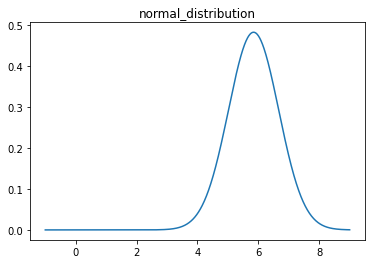

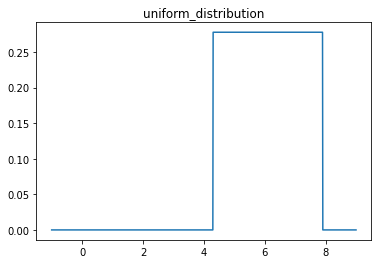

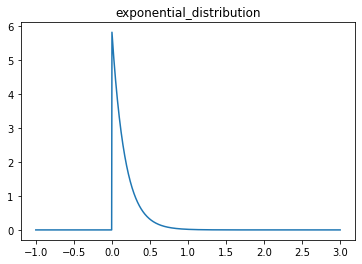

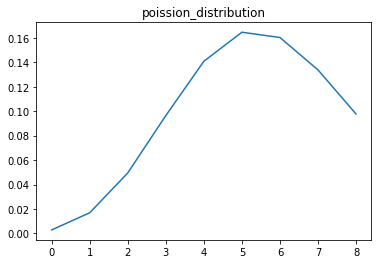

In [ ]:
graph = DrawGraph(df['sepal.length'].values)
graph.draw_normal_distribution()
graph.draw_uniform_distribution()
graph.draw_exponential_distribution(end = 3)
graph.draw_poission_distribution()

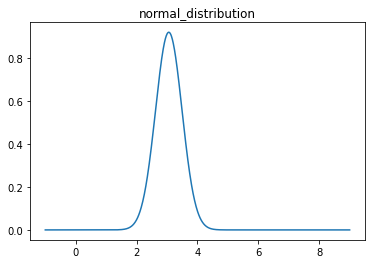

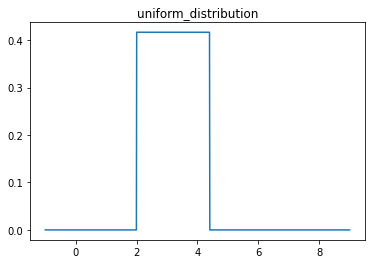

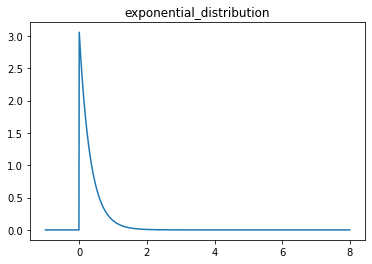

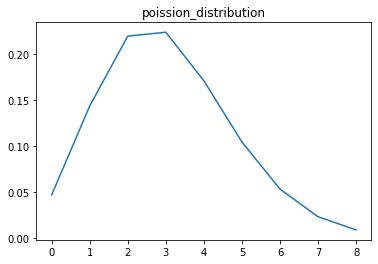

In [ ]:
graph = DrawGraph(df['sepal.width'].values)
graph.draw_normal_distribution()
graph.draw_uniform_distribution()
graph.draw_exponential_distribution()
graph.draw_poission_distribution()

># **Q2.**

In [ ]:
#Q2
class Describe():
    def __init__(self,arr):
        if not arr.ndim == 1:
            raise ValueError('Send a 1 dimension array')
        self.arr = arr
    
    #a.
    def mean(self):
        _sum = sum(self.arr)
        return _sum / len(self.arr)

    #b.
    def median(self):
        if(len(self.arr) == 0):
            return 0

        sorted_arr = np.sort(self.arr)
        mid = len(self.arr) // 2
        if(len(self.arr) % 2 == 1):
            return sorted_arr[mid]
        else:
            return (sorted_arr[mid] + sorted_arr[mid - 1]) / 2

    #c.
    def variance(self):
        mean = self.mean()
        sum_of_square_of_deviations = sum(map(lambda x : (x - mean)**2, self.arr))
        variance = sum_of_square_of_deviations / len(self.arr)
        return variance

    #d.
    def standard_deviation(self):
        mean = self.mean()
        sum_of_square_of_deviations = sum(map(lambda x : (x - mean)**2, self.arr))
        variance = sum_of_square_of_deviations / len(self.arr)
        standard_dev = np.sqrt(variance)
        return standard_dev

    #e.
    def skewness(self):
        mean = self.mean()
        median = self.median()
        sd = self.standard_deviation()
        return 3 * (median - mean) / sd

    #f.
    def kurtosis(self):
        n = len(self.arr)
        mean = self.mean()
        sd = self.standard_deviation()
        sum_of_deviations_pow4 = sum(map(lambda x : (x - mean)**4, self.arr))
        sd_pow4 = sd**4
        return sum_of_deviations_pow4 / ( n * sd_pow4)


    


In [ ]:
describe = Describe(df['sepal.length'].values)
print("Mean is",describe.mean())
print("Median is",describe.median())
print("Variance is",describe.variance())
print("sd is",describe.standard_deviation())
print("skewness is",describe.skewness())
print("kurtosis is",describe.kurtosis())


Mean is 5.843333333333335
Median is 5.8
Variance is 0.6811222222222222
sd is 0.8253012917851409
skewness is -0.15751823157675193
kurtosis is 2.4264320510750217


># **Q3.**

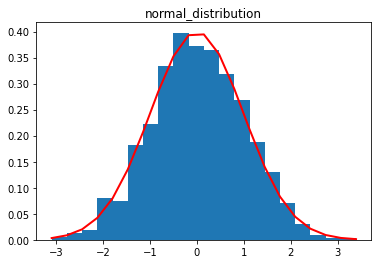

In [ ]:
#3
def fit_plot_normal(mu = 0,sigma = 1):
    s = np.random.normal(mu, sigma, 1000)
    # Create the bins and histogram
    count, bins, ignored = plt.hist(s, 20,density = 1)
    # Plot the distribution curve
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    plt.title('normal_distribution')
    plt.show()
  
fit_plot_normal()